classify images

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Here we going to classfiying an image for Fashion MNIST data set and in this dataset there are 70,000 grayscale images in 10 categories.

The images show individual articles of clohting at low resoution(28 * 28)


In [ ]:
fashion_mnst =  tf.keras.datasets.fashion_mnist 

(train_img, train_label),(test_img, test_label) = fashion_mnst.load_data() #loading data set
# train_img, train_label are array of training set-the data the model uses to learn

4423680/4422102 [==============================] - 0s 0us/step


Label  class
  0.   T-shirt/top
  1.   Trouser
  2.  Pullover
  3.   Dress
  4.   coat
  5.   Sandal
  6.   Shirt
  7.   Sneaker
  8.   Bag
  9.   Ankel boot

In [ ]:
class_names = [' T-shirt/top','Trouser','Pullover','Dress','coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']

In [ ]:
train_img.shape #explore the data


(60000, 28, 28)

In [ ]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_img.shape

(10000, 28, 28)

Preprocessed data before training the network

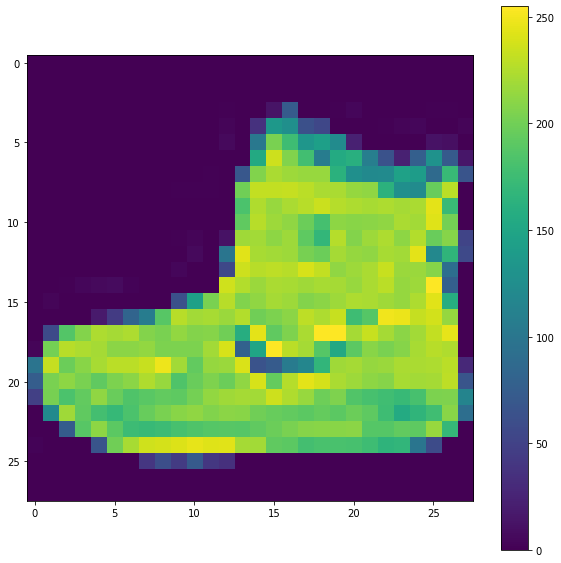

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_img = train_img / 255.0
test_img = test_img / 255.0

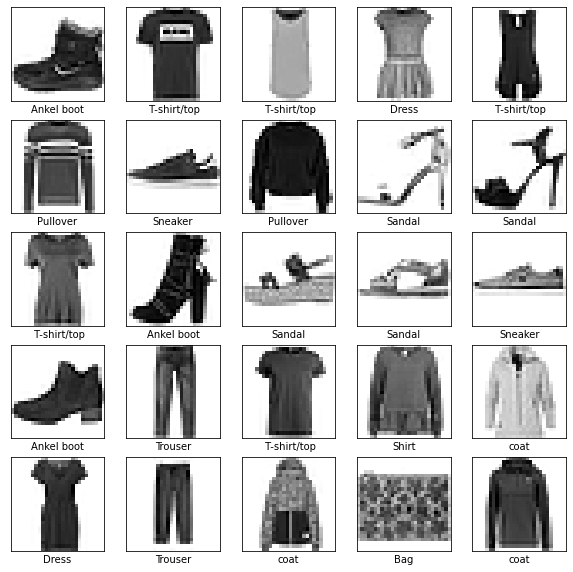

In [ ]:
# verify the data is in the correct format

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i]])
plt.show()

# Build the model
here the neural network requires configuring the layers of the model, then compiling the model.

Setup the layers

The basic building block of a neural network is the layer, layers extract representations from the data fed them.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

here using tf.keras.layers.Flatten transform the format of the images from two-dimensional array to one-dimensional array

tf.keras.layers.Dense layers are connected, neural layers.The first Dense layer has 128 nodes. The second Dense layer returns a logits array with length of 10.

# compile the model

there are few more settings and this are added during the model's compile step:


*   Loss function: this will measure to get accurate the model during training.
*   Optimizer:This model is updated based on the data it sees ans its loss function.
*   Metircs: This used to monitor the traning and testing steps.




In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =  ["accuracy"])

# Train the model

There are few steps for training the model.

1.  Feed the training data to the model.
2.  The model learns to associate images and labels.
3.  Ask the model to make predictions about a test set.
4.  Verify that the predictions match the label from the test_ label array.


In [ ]:
model.fit(train_img, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6310 - accuracy: 0.7794
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3773 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3363 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3087 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2939 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2713 - accuracy: 0.8987
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2640 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2568 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2461 - accuracy: 0.9095
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

# Evaluate accuracy

compare the model performs on the test dataset

In [ ]:
test_loss, test_acc = model.evaluate( test_img, test_label, verbose=2)

print('\n Test accuracy', test_acc)

313/313 - 0s - loss: 0.3386 - accuracy: 0.8845

 Test accuracy 0.8845000267028809


# Make prediction

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions =  probability_model.predict(test_img)

In [ ]:
predictions[0]# first prediction

array([1.62246621e-07, 6.39568343e-10, 1.45589523e-08, 5.46498562e-08,
       1.19240084e-09, 4.82128607e-03, 1.03139094e-07, 2.11092643e-02,
       4.98938380e-06, 9.74064112e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_label[0]

9

In [ ]:
predictions[0]

array([1.62246621e-07, 6.39568343e-10, 1.45589523e-08, 5.46498562e-08,
       1.19240084e-09, 4.82128607e-03, 1.03139094e-07, 2.11092643e-02,
       4.98938380e-06, 9.74064112e-01], dtype=float32)

In [ ]:
def plot_img(i, pre_array, true_label, img):
  true_label, img =  true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  pre_label = np.argmax(pre_array)
  if pre_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[pre_label],
                                      100*np.max(pre_array),
                                      class_names[true_label]),
                                      color=color)

In [ ]:
def plot_value_array(i, pre_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), pre_array,color = "#777777")
    plt.ylim([0, 1])
    pre_label = np.argmax(pre_array)

    thisplot[pre_label].set_color('red')
    thisplot[true_label].set_color('blue')

# verify predictions

model are trained, so make some predictions about some images.

* correct prediction label are blue in color.
* incorrect prediction label are red color.

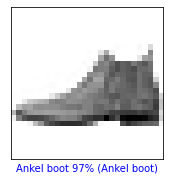

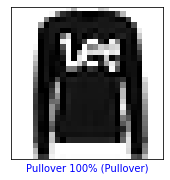

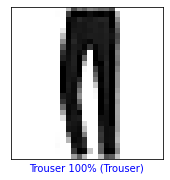

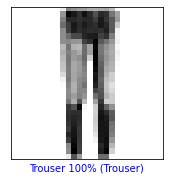

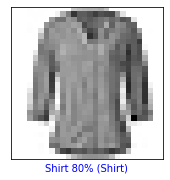

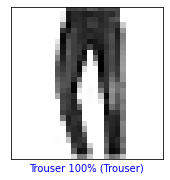

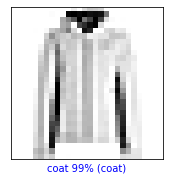

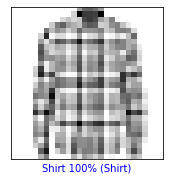

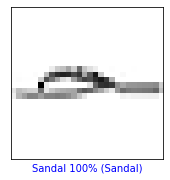

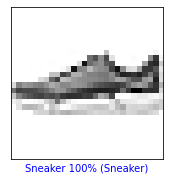

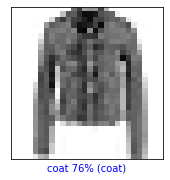

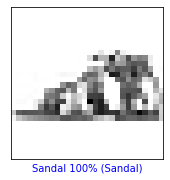

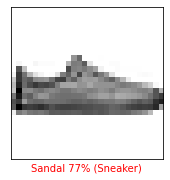

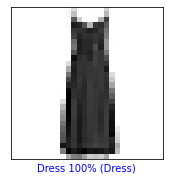

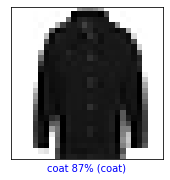

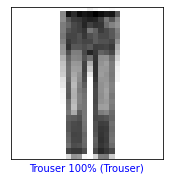

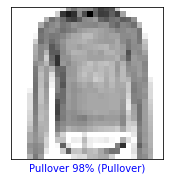

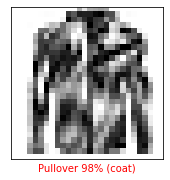

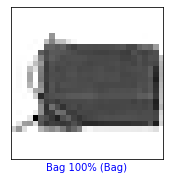

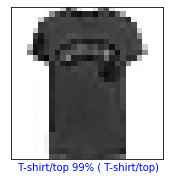

In [ ]:
for i in range(0,20):
  plt.figure(figsize=(6,3))
  plt.subplot(1, 2, 1)
  plot_img(i,predictions[i], test_label, test_img)

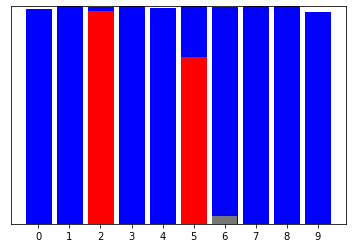

In [ ]:
for i in range(0,20):
  plot_value_array(i, predictions[i], test_label)

plot several images with their predictions.

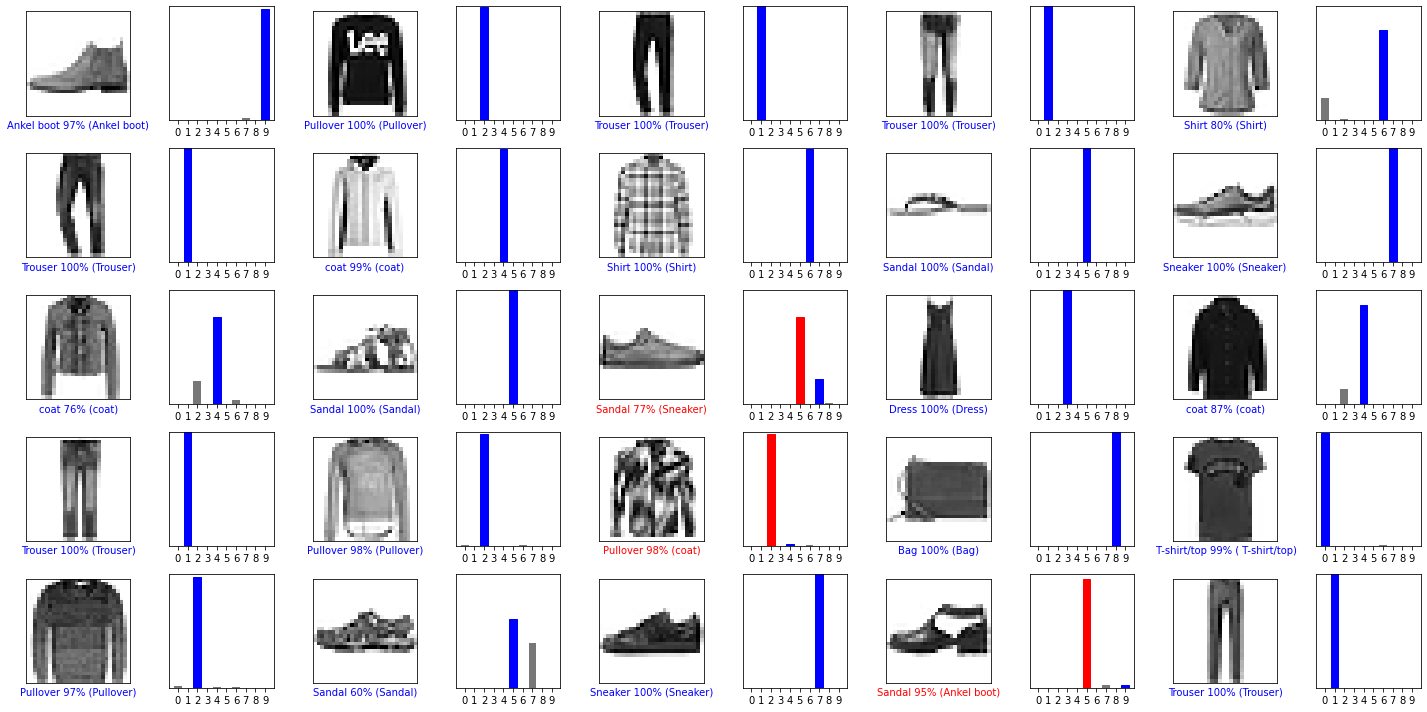

In [ ]:
n_rows = 5
n_cols = 5
n_img = n_rows * n_cols
plt.figure(figsize=(2 * 2 * n_cols, 2*n_rows))

for i in range(n_img):
  plt.subplot(n_rows, 2*n_cols, 2*i+1)
  plot_img(i, predictions[i], test_label,test_img)
  plt.subplot(n_rows, 2*n_cols, 2*i+2)
  plot_value_array(i,predictions[i], test_label)
plt.tight_layout()
plt.show()

# Use the trained model to check the prediction

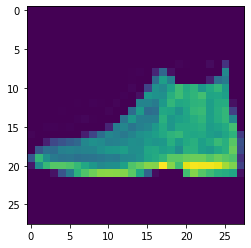

In [ ]:
img = test_img[0]
plt.imshow(img)

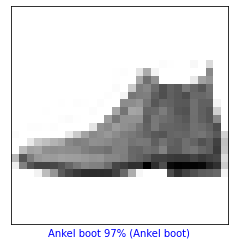

In [ ]:
plot_img(0,predictions[0], test_label, test_img)